In [1]:
%matplotlib inline

# Basic imports

In [2]:
import pandas as pd
import numpy as np
from Bio import SeqIO

from matplotlib import pyplot as plt
from matplotlib.patches import Rectangle


from scipy import stats
from Bio.Alphabet.IUPAC import IUPACProtein

import glob


import datetime
year = datetime.date.today().year
month = datetime.date.today().month

import os
figs_dir = '../Results/Figures/{}_{:02}'.format(year, month)
if not os.path.exists(figs_dir):
    os.makedirs(figs_dir)

In [3]:
import matplotlib
matplotlib.rcParams['xtick.labelsize'] = 12
matplotlib.rcParams['ytick.labelsize'] = 12
matplotlib.rcParams['axes.labelsize'] = 12
matplotlib.rcParams['axes.titlesize'] = 12

matplotlib.rcParams['axes.grid'] = True
matplotlib.rcParams['grid.color'] = '0.5'
matplotlib.rcParams['grid.linewidth'] = '0.5'

matplotlib.rcParams['axes.edgecolor'] = '0.25'
matplotlib.rcParams['xtick.color'] = '0'
matplotlib.rcParams['ytick.color'] = '0'

matplotlib.rcParams['xtick.major.width'] = 2
matplotlib.rcParams['ytick.major.width'] = 2
matplotlib.rcParams['ytick.major.size'] = 5
matplotlib.rcParams['xtick.major.size'] = 5
matplotlib.rcParams['axes.spines.right'] = True
matplotlib.rcParams['axes.spines.left'] = True
matplotlib.rcParams['axes.spines.top'] = True
matplotlib.rcParams['axes.spines.bottom'] = True


matplotlib.rcParams['font.family'] = 'sans-serif'
matplotlib.rcParams['font.sans-serif'] = 'Helvetica Neue'
matplotlib.rcParams['font.weight']='ultralight'
matplotlib.rcParams['axes.axisbelow'] = True


# Functions for parsing couplings and contacts dataframes

In [4]:
from supporting_functions import *

# Single example

In [ ]:
contact_number_modifier = 1
chain_cutoff = 12
metrics = ['CA', 'CB', 'SCcenter']
df_contacts_dict = {}
for metric in metrics:
    df_contacts_dict[metric] = {}

lengths = []
sequences = []
ppv_dict = {}
for metric in metrics:
    ppv_dict[metric] = []

CA_distance_cutoff = 8
CB_distance_cutoffs = []
SC_distance_cutoffs = []

# couplings_file = '../../Structural_analysis/scratch/ancestral_seq/simulated_pyvolve_jtt_2.couplings'
# prot_name = '4kx4'
couplings_file = '../../Phylogenetic_couplings/Code/temp.couplings'
prot_name = '4kx4'
# couplings_file = '../../Structural_analysis/scratch/ancestral_seq/4kx4_noweight_gaps.couplings'
# prot_name = '4kx4'
# couplings_file = '../../Structural_analysis/scratch/ancestral_seq/raxml_temp.couplings'
# prot_name = '4kx4'
# couplings_file = '../../Structural_analysis/ecoli_all_pdbs/couplings/4kx4_193_rp75.couplings'
# prot_name = couplings_file.split('/')[-1].split('_')[0]
print('###', prot_name)
total_contacts = 0
cutoff=0
for metric in metrics:            
    df_couplings = pd.read_csv(couplings_file, sep=' ', header=None)
    contact_file_loc = '../../Structural_analysis/ecoli_all_pdbs/contact_matrices/{}_{}_contacts.csv'.format(prot_name, metric)
    try:
        df_contacts = pd.read_csv(contact_file_loc, index_col=0)
    except FileNotFoundError:
        print(couplings_file)
        continue
    df_contacts, df_contacts_stack = process_contacts_df(df_contacts, 12)
    df_couplings, df_couplings_pivot, df_couplings_stack = process_couplings_df(df_couplings, df_contacts, 12)
    records = list(SeqIO.parse('../../Structural_analysis/ecoli_all_pdbs/wt_fastas/{}.fasta'.format(prot_name), 'fasta'))
    assert len(records)==1
    seq = str(records[0].seq)
    merged_df = merge_contacts_couplings(df_contacts_stack, df_couplings_stack, seq)
    number_to_test = round(len(df_contacts.index)* contact_number_modifier) 
    if metric == 'CA':
        total_contacts = merged_df[merged_df['distance']<CA_distance_cutoff]['distance'].count()
        ppv, counts = ppv_from_df(merged_df, number_to_test, length_cutoff=CA_distance_cutoff)
        print(metric, ppv, total_contacts)
    else:
        temp = df_contacts_stack.sort_values('distance')[:total_contacts]
        cutoff = temp.iloc[total_contacts-1]['distance']
        ppv, counts = ppv_from_df(merged_df, number_to_test, length_cutoff=cutoff)
        print(metric, ppv, len(temp.index), cutoff)
        if metric == 'CB':
            CB_distance_cutoffs.append(cutoff)
        elif metric == 'SCcenter':
            SC_distance_cutoffs.append(cutoff)

    if metric == 'CA':
        lengths.append(len(df_contacts.columns))
    df_contacts_dict[metric][prot_name] = df_contacts_stack

In [ ]:
# contact_number_modifier = 0.5
# number_to_test = round(len(df_contacts.index)* contact_number_modifier) 
# length_cutoff = 8

# contact_file_loc = '../../Structural_analysis/ecoli_all_pdbs/contact_matrices/1b63_{}_contacts.csv'.format('CA')
# df_contacts = pd.read_csv(contact_file_loc, index_col=0)
# #     df_contacts.head()
# df_contacts.columns = df_contacts.columns.astype(int)
# tpr, counts = tpr_from_df(df_couplings_pivot, df_contacts, number_to_test, length_cutoff=length_cutoff)
# print(tpr)

# Iterating through all available
**This will take a few minutes to run**

In [6]:
hmmer_results_dict = {}
hmmer_results_dict['rp75'] =  pd.read_csv('../../Structural_analysis/rp75_phmmer.csv', index_col=0, header=None)
hmmer_results_dict['rp55'] =  pd.read_csv('../../Structural_analysis/rp55_phmmer.csv', index_col=0, header=None)
hmmer_results_dict['rp35'] =  pd.read_csv('../../Structural_analysis/rp35_phmmer.csv', index_col=0, header=None)
hmmer_results_dict['rp15'] =  pd.read_csv('../../Structural_analysis/rp15_phmmer.csv', index_col=0, header=None)


hmmer_results_dict['rp75'].head()

,1,2,3,4,5,6,7
0,,,,,,,
1,3f85,86,DONE,FMC1_ECOH1,CFA/I fimbrial subunit B,1.900000e-84,show
2,4hg0,26734,DONE,I6C1T0_SHIFL,Magnesium and cobalt efflux protein CorC,1.400000e-120,show
3,4lfu,5824,DONE,A0A1S9JLU1_SHIBO,Transcriptional regulator SdiA,1.000000e-157,show
4,1dd9,11801,DONE,I2RF52_ECOLX,DNA primase,6.500000e-203,show
5,2pth,12659,DONE,A0A017IF69_ECOLX,Peptidyl-tRNA hydrolase,1.300000e-127,show


In [19]:
contact_number_modifier = 1
chain_cutoff = 12
metrics = ['CA', 'CB', 'SCcenter'] ###Order here is important, CA has to come first
df_contacts_dict = {}
for metric in metrics:
    df_contacts_dict[metric] = {}

lengths = []
sequences = []
ppv_dict = {}
for metric in metrics:
    ppv_dict[metric] = []

CA_distance_cutoff = 8
CB_distance_cutoffs = {}
SC_distance_cutoffs = {}

for couplings_file in glob.glob('../../Structural_analysis/ecoli_all_pdbs/couplings/rp75/*.couplings') +\
                        glob.glob('../../Structural_analysis/ecoli_all_pdbs/couplings/rp55/*.couplings') +\
                        glob.glob('../../Structural_analysis/ecoli_all_pdbs/couplings/rp35/*.couplings') +\
                        glob.glob('../../Structural_analysis/ecoli_all_pdbs/couplings/rp15/*.couplings'):
    prot_name = couplings_file.split('/')[-1].split('_')[0]
    db_name = couplings_file.split('/')[-1].split('_')[2].strip('.couplings')
    nseqs = hmmer_results_dict[db_name][hmmer_results_dict[db_name][1]==prot_name].iloc[0][2]
    if prot_name in df_contacts_dict[metrics[0]]:
        continue
    if nseqs < 2000:
        continue
    print('### {} ({})'.format(prot_name, nseqs))
    total_contacts = 0
    cutoff=0
    for metric in metrics:            
        df_couplings = pd.read_csv(couplings_file, sep=' ', header=None)
        contact_file_loc = '../../Structural_analysis/ecoli_all_pdbs/contact_matrices/{}_{}_contacts.csv'.format(prot_name, metric)
        try:
            df_contacts = pd.read_csv(contact_file_loc, index_col=0)
        except FileNotFoundError:
            print(couplings_file)
            continue
        df_contacts, df_contacts_stack = process_contacts_df(df_contacts, 12)
        df_couplings, df_couplings_pivot, df_couplings_stack = process_couplings_df(df_couplings, df_contacts, 12)
        records = list(SeqIO.parse('../../Structural_analysis/ecoli_all_pdbs/wt_fastas/{}.fasta'.format(prot_name), 'fasta'))
        assert len(records)==1
        seq = str(records[0].seq)
        merged_df = merge_contacts_couplings(df_contacts_stack, df_couplings_stack, seq)


        number_to_test = round(len(df_contacts.index)* contact_number_modifier) 


        if metric == 'CA':
            total_contacts = merged_df[merged_df['distance']<CA_distance_cutoff]['distance'].count()
            ppv, counts = ppv_from_df(merged_df, number_to_test, length_cutoff=CA_distance_cutoff)
            print(metric, ppv, total_contacts)
            lengths.append(len(df_contacts.columns))
            sequences.append(nseqs)
        else:
            temp = df_contacts_stack.sort_values('distance')[:total_contacts]
            cutoff = temp.iloc[total_contacts-1]['distance']
            ppv, counts = ppv_from_df(merged_df, number_to_test, length_cutoff=cutoff)
            print(metric, ppv, len(temp.index), cutoff)
            if metric == 'CB':
                CB_distance_cutoffs[prot_name] = cutoff
            elif metric == 'SCcenter':
                SC_distance_cutoffs[prot_name] = cutoff
                
        ppv_dict[metric].append(ppv)
        df_contacts_dict[metric][prot_name] = df_contacts_stack
    
        

### 3a7r (4807)
CA 0.284866468843 573
CB 0.362017804154 573 7.53292894363
SCcenter 0.412462908012 573 7.35303640366
### 1jl1 (9383)
CA 0.467105263158 293
CB 0.585526315789 293 7.88266468048
SCcenter 0.677631578947 293 8.03883457184
### 1dnl (7932)
CA 0.276923076923 235
CB 0.364102564103 235 7.69952344894
SCcenter 0.451282051282 235 7.37658834457
### 3n37 (6815)
CA 0.116197183099 265
CB 0.12323943662 265 7.08775997162
SCcenter 0.144366197183 265 5.98419904709
### 2ex2 (6594)
CA 0.392543859649 901
CB 0.475877192982 901 7.64267539978
SCcenter 0.530701754386 901 7.53948783875
### 5ghu (3693)
CA 0.333333333333 432
CB 0.467661691542 432 7.87796115875
SCcenter 0.542288557214 432 7.99609899521
### 4d02 (4572)
CA 0.446115288221 717
CB 0.581453634085 717 7.51508903503
SCcenter 0.664160401003 717 7.20421791077
### 1k77 (5990)
CA 0.3828125 374
CB 0.50390625 374 7.37524461746
SCcenter 0.578125 374 7.008934021
### 1sur (7766)
CA 0.344186046512 256
CB 0.423255813953 256 7.45167684555
SCcenter 0.49767

# Visualizing diffs

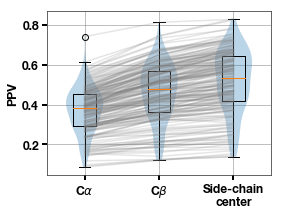

In [20]:
fig, ax = plt.subplots(figsize=(4,3))
ax.violinplot([ppv_dict[metric] for metric in metrics], showextrema=False);
ax.boxplot([ppv_dict[metric] for metric in metrics]);
for i in range(len(lengths)):
    ax.plot([1,2,3], [ppv_dict['CA'][i], ppv_dict['CB'][i], ppv_dict['SCcenter'][i]], color='gray', alpha=0.2)
ax.set_xticklabels([r'C$\alpha$', r'C$\beta$', 'Side-chain\ncenter'])
ax.set_ylabel('PPV')
plt.savefig('{}/empirical_boxplots.pdf'.format(figs_dir), bbox_inches='tight')

#################
CA vs SC center
198 1.38442803268
WilcoxonResult(statistic=0.0, pvalue=3.055328640259122e-34)
#################
CB vs SC center
198 1.11345487023
WilcoxonResult(statistic=27.0, pvalue=1.4379307870416994e-33)


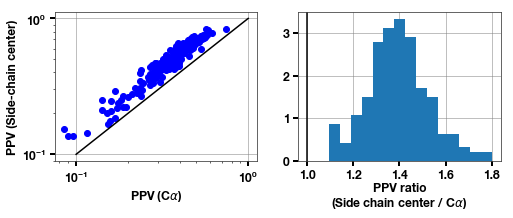

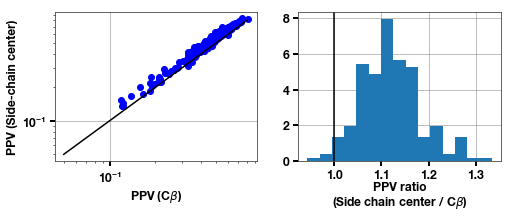

In [21]:
loglog=True

fig, ax_arr = plt.subplots(nrows=1, ncols=2, figsize=(8, 2.75))
if not loglog:
    ax_arr[0].plot(ppv_dict['CA'], ppv_dict['SCcenter'], 'bo')
    ax_arr[0].plot([0.1,1], [0.1,1], 'k-')
else:
    ax_arr[0].loglog(ppv_dict['CA'], ppv_dict['SCcenter'], 'bo')
    ax_arr[0].loglog([0.1,1], [0.1,1], 'k-')
ax_arr[0].set_xlabel(r'PPV (C$\alpha$)')
ax_arr[0].set_ylabel('PPV (Side-chain center)')
deltas = np.array(ppv_dict['SCcenter']) / np.array(ppv_dict['CA'])
ax_arr[1].hist(deltas, 15, normed=True)
ax_arr[1].axvline(1, color='k')
ax_arr[1].set_xlabel(r'PPV ratio''\n'r'(Side chain center / C$\alpha$)')
print('#################')
print('CA vs SC center')
print(len(ppv_dict['CA']), np.median(np.array(ppv_dict['SCcenter'])/np.array(ppv_dict['CA'])))
print(stats.wilcoxon(ppv_dict['CA'], ppv_dict['SCcenter']))
plt.savefig('{}/sc_vs_ca_empirical.pdf'.format(figs_dir), bbox_inches='tight')

fig, ax_arr = plt.subplots(nrows=1, ncols=2, figsize=(8,2.75))
if not loglog:
    ax_arr[0].plot(ppv_dict['CB'], ppv_dict['SCcenter'], 'bo')
    ax_arr[0].plot([0.05,0.8], [0.05,0.8], 'k-')
else:
    ax_arr[0].loglog(ppv_dict['CB'], ppv_dict['SCcenter'], 'bo')
    ax_arr[0].loglog([0.05,0.8], [0.05,0.8], 'k-')
ax_arr[0].set_xlabel(r'PPV (C$\beta$)')
ax_arr[0].set_ylabel('PPV (Side-chain center)')

deltas = np.array(ppv_dict['SCcenter']) / np.array(ppv_dict['CB'])
ax_arr[1].hist(deltas, 15, normed=True)
ax_arr[1].axvline(1, color='k')
ax_arr[1].set_xlabel(r'PPV ratio''\n'r'(Side chain center / C$\beta$)')
print('#################')
print('CB vs SC center')
print(len(ppv_dict['CB']), np.median(np.array(ppv_dict['SCcenter'])/np.array(ppv_dict['CB'])))
print(stats.wilcoxon(ppv_dict['CB'], ppv_dict['SCcenter']))

SpearmanrResult(correlation=0.28298578299814764, pvalue=5.3534430245693957e-05)


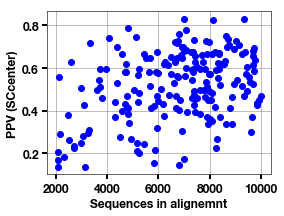

In [17]:
metric = 'SCcenter'
fig, ax = plt.subplots(figsize=(4,3))
ax.plot(sequences, ppv_dict[metric], 'bo')
ax.set_xlabel('Sequences in alignemnt')
ax.set_ylabel('PPV ({})'.format(metric))
print(stats.spearmanr(sequences, ppv_dict[metric]))

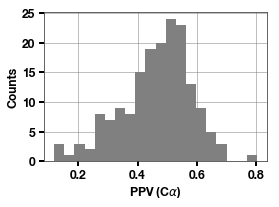

In [12]:
fig, ax = plt.subplots(figsize=(4, 2.75))

ax.hist(ppv_dict['CA'], 20, color='gray')
ax.set_xlabel(r'PPV (C$\alpha$)')
ax.set_ylabel('Counts')
plt.savefig('{}/ca_empirical_hist.pdf'.format(figs_dir), bbox_inches='tight')

# Contact density in structures

In [ ]:
chain_cutoff = 12
length_cutoff = 8.

lengths = []
possible_contacts = []
actual_contacts = []
all_contact_dists = []
for i, contact_file_loc in list(enumerate(glob.glob('../Data/Contact_matrices/*_SCcenter_contacts.csv')))[:]:
    df_contacts = pd.read_csv(contact_file_loc, index_col=0)
    df_contacts, df_contacts_stack = process_contacts_df(df_contacts, chain_cutoff)
    lengths.append(len(df_contacts.index))
    all_contact_dists.extend(list(df_contacts_stack['distance']))
    actual_contacts.append((df_contacts_stack['distance'] <= length_cutoff).sum())
    possible_contacts.append(df_contacts_stack['distance'].count())
    if (df_contacts_stack['distance'] <= length_cutoff).sum() < len(df_contacts.index):
        print(contact_file_loc, len(df_contacts.index))

In [ ]:
fig, ax = plt.subplots()
ax.loglog(lengths, possible_contacts, 'bo')
ax.set_xlabel('Protein length')
ax.set_ylabel('Possible contacts')


fig, ax = plt.subplots()
ax.loglog(possible_contacts, actual_contacts, 'bo')
ax.set_xlabel('Possible contacts')
ax.set_ylabel('Actual contacts')

fig, ax = plt.subplots()
ax.plot(lengths, np.array(actual_contacts)/np.array(possible_contacts), 'bo')
ax.set_xlabel('Protein length')
ax.set_ylabel('Actual contacts/Possible contacts')

fig, ax = plt.subplots()
ax.plot(lengths, np.array(actual_contacts)/np.array(lengths), 'bo')
ax.set_xlabel('Protein length')
ax.set_ylabel('Actual contacts/Protein length')

In [ ]:
fig, ax = plt.subplots()
ax.axvspan(0, 7, color='k', alpha=0.15)
ax.hist(all_contact_dists, 1000);
ax.set_xlim(0, 20)
# ax.axvline(7, color='k')

# Contact identification differences by metric

# Amino acid representation in contacts

In [24]:
contact_number_modifier = 1
chain_cutoff = 12
cutoff=''

# metric='CA'
metric='SCcenter'
aas = list(IUPACProtein.letters)

fp_distances = []
all_distances = []

successes_aa = {}
failures_aa = {}
for aa in aas:
    successes_aa[aa] = []
    failures_aa[aa] = []
    
prots_analyzed = []    
for couplings_file in glob.glob('../Data/Empirical_couplings/rp75/*.couplings') +\
                        glob.glob('../Data/Empirical_couplings/rp55/*.couplings') +\
                        glob.glob('../Data/Empirical_couplings/rp35/*.couplings'):

    prot_name = couplings_file.split('/')[-1].split('_')[0]
    print(prot_name)
    db_name = couplings_file.split('/')[-1].split('_')[2].strip('.couplings')
    nseqs = hmmer_results_dict[db_name][hmmer_results_dict[db_name][1]==prot_name].iloc[0][2]
    if prot_name in prots_analyzed:
        continue
    if nseqs < 2000:
        continue
        
    contact_file_loc = '../Data/Contact_matrices/{}_CA_contacts.csv'.format(prot_name, metric)
    try:
        df_contacts = pd.read_csv(contact_file_loc, index_col=0)
    except FileNotFoundError:
        continue
        
    if metric == 'CA':
        cutoff = 8
    elif metric == 'SCcenter':
        cutoff = SC_distance_cutoffs[prot_name]
    elif metric == 'CB':
        cutoff = CB_distance_cutoffs[prot_name]
    
    contact_file_loc = '../Data/Contact_matrices/{}_{}_contacts.csv'.format(prot_name, metric)
    try:
        df_contacts = pd.read_csv(contact_file_loc, index_col=0)
    except FileNotFoundError:
        continue

    df_couplings = pd.read_csv(couplings_file, sep=' ', header=None)    
    df_contacts, df_contacts_stack = process_contacts_df(df_contacts, chain_cutoff)
    df_couplings, df_couplings_pivot, df_couplings_stack = process_couplings_df(df_couplings, df_contacts, chain_cutoff)
    records = list(SeqIO.parse('../../Structural_analysis/ecoli_all_pdbs/wt_fastas/{}.fasta'.format(prot_name), 'fasta'))
    assert len(records)==1
    seq = str(records[0].seq)
    merged_df = merge_contacts_couplings(df_contacts_stack, df_couplings_stack, seq)
    
    number_to_test = round(len(df_contacts.index)* contact_number_modifier) 
    tps_df, fps_df, fns_df = errors_from_df(merged_df, number_to_test, cutoff)
    
    total_contacts += merged_df[merged_df['distance'] <= cutoff]['distance'].count()
    
    for aa in aas:
        tps_aa = tps_df[(tps_df['aa1_aa'] == aa) | (tps_df['aa2_aa'] == aa)]['distance'].count()
        tps_total = tps_df['distance'].count()
        
        temp_df = merged_df[(merged_df['aa1_aa'] == aa) | (merged_df['aa2_aa'] == aa)]
        contacts_aa = temp_df[temp_df['distance'] <= cutoff]['distance'].count()        
        contacts_total = merged_df[merged_df['distance'] <= cutoff]['distance'].count()
        
        if contacts_aa > 0:
            successes_aa[aa].append((tps_aa/tps_total)/(contacts_aa/contacts_total))
            
        fps_aa = fps_df[(fps_df['aa1_aa'] == aa) | (fps_df['aa2_aa'] == aa)]['distance'].count()
        fps_total = fps_df['distance'].count()
        
        temp_df = merged_df[(merged_df['aa1_aa'] == aa) | (merged_df['aa2_aa'] == aa)]
        contacts_aa = temp_df[temp_df['distance'] > cutoff]['distance'].count()        
        contacts_total = merged_df[merged_df['distance'] > cutoff]['distance'].count()
        
        if contacts_aa > 0:
            failures_aa[aa].append((fps_aa/fps_total)/(contacts_aa/contacts_total))
    fp_distances.extend(list(fps_df['distance']))
    all_distances.extend(list(merged_df['distance']))
    prots_analyzed.append(prot_name)

3a7r
5iwu
1jl1
1dnl
3n37
2ex2
4mee
5ghu
4d02
1k77
1sur
1mug
3g7u
1qtw
1xw8
1m33
3d1r
4lfu
4s2v
5uqi
3gp6
1ew4
1nnx
4wkc
3dnu
1azo
5a61
1n57
2o90
3hl8
5igi
1di6
5tmp
1e5k
3eye
5w8n
1pf5
1b8x
1ln4
2wlr
2uyt
5hqt
4pde
5dko
1tt8
4lit
1r9l
4psy
1m65
2iy9
2gq1
2dxa
3q98
5cb3
4pdn
2zhh
1qus
1gmx
3qd7
1vly
1fdr
2wkx
1ctt
3p7i
3my2
1jsx
1vi7
1yt3
1jyh
1m40
2xov
1ujc
4cdp
2h09
2jfn
1ks9
2dbn
3htv
1jgs
4cvr
2xpw
4pya
2asr
3nbx
2b0c
4azw
3bxy
1byi
1vk6
1ixh
4dcm
3dxy
2q7w
1jpd
2cxa
4jht
2au7
4hbu
2z98
1ej0
1sdi
3hfi
1j9b
3ss7
1pdo
4kx4
3tut
2pqx
3p3g
1zyl
1fjj
2cfq
1z9t
1hw7
1psw
5cof
2y90
2gzs
4u4v
1hzt
3i87
1ri6
4whe
1gsa
2pgx
1l6p
3sew
2bue
3q7m
1wxi
2c4n
4dt4
2hnf
4iwy
2vgd
2p5z
4xyw
5u7f
3r2q
3o7q
5d8g
4ead
1k4n
3qa9
1y4c
5e1l
3grh
3u66
1ml8
5jwy
3nxc
1vsr
2vec
1r9l
1u94
4psy
1cuk
1tt8
4lit
2gq1
2iy9
2dxa
3a7l
3q98
2gui
5cb3
2yxn
1m65
2wkx
1fdr
1vly
3p7i
1ctt
1yoe
2fvy
3sy1
1euw
2zhh
4pdn
1qus
1gmx
3qd7
1m40
4e8b
2jf2
1dd9
1ujc
2xov
2h09
4cdp
2jfn
1jsx
1yt3
1vi7
1i6p
1dnl
3n37
1ni5
2ex2
5ghu


In [ ]:
success_labels = []
success = []
success_stdevs = []
success_stderrs = []

for aa,vals in successes_aa.items():
    success_labels.append(aa)
    success.append(np.mean(vals))
#     stdevs.append(np.std(vals))
#     stderrs.append(np.std(vals)/len(vals))

failures_labels = []
failures = []
failures_stdevs = []
failures_stderrs = []
for aa,vals in failures_aa.items():
    failures_labels.append(aa)
    failures.append(np.mean(vals))

In [ ]:
fig, all_ax = plt.subplots(nrows=1, ncols=2, figsize=(12,3), sharey=True)
ax = all_ax[0]
ax.axhline(1, c='k')
ax.bar(np.arange(len(success_labels)), success, 0.8)
# ax.bar(np.arange(len(rats)), rats, 0.8, yerr=stdevs)
ax.set_xticks(np.arange(len(success_labels)))
ax.set_xticklabels(success_labels);

ax = all_ax[1]
ax.axhline(1, c='k')
ax.axhline(1, c='k')
ax.bar(np.arange(len(failures_labels)), failures, 0.8)
# ax.bar(np.arange(len(rats)), rats, 0.8, yerr=stdevs)
ax.set_xticks(np.arange(len(failures_labels)))
ax.set_xticklabels(failures_labels);


10564 29024


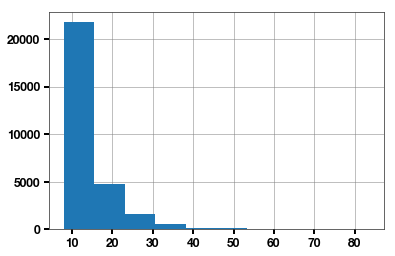

In [19]:
fig, ax = plt.subplots()
ax.hist(fp_distances)
print(len([i for i in fp_distances if i < 10]), len(fp_distances))

193192 6361608


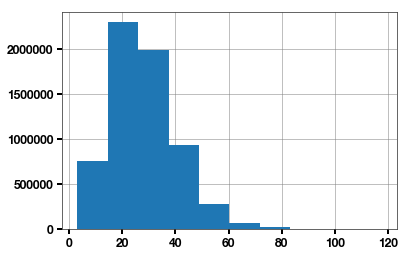

In [20]:
fig, ax = plt.subplots()
ax.hist(all_distances)
print(len([i for i in all_distances if i < 10]), len(all_distances))


(array([  9.03483874e-02,   6.46225308e-02,   3.49967438e-02,
          2.68205739e-02,   1.67172455e-02,   8.67791528e-03,
          5.15429397e-03,   3.24994199e-03,   1.91575528e-03,
          9.57877640e-04,   6.61391704e-04,   6.38585093e-04,
          3.76309073e-04,   3.30695852e-04,   1.71049579e-04,
          1.59646273e-04,   6.84198314e-05,   2.28066105e-05,
          4.56132209e-05,   3.42099157e-05]),
 array([  6.01257753,   9.91928546,  13.82599339,  17.73270133,
         21.63940926,  25.54611719,  29.45282512,  33.35953305,
         37.26624098,  41.17294891,  45.07965684,  48.98636477,
         52.8930727 ,  56.79978063,  60.70648856,  64.61319649,
         68.51990442,  72.42661235,  76.33332028,  80.24002821,  84.14673615]),
 <a list of 20 Patch objects>)

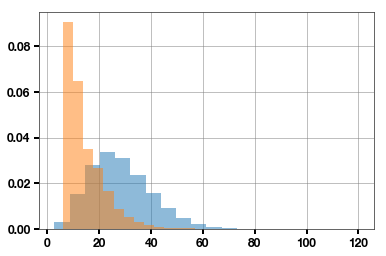

In [25]:
fig, ax = plt.subplots()
ax.hist(all_distances, 20, normed=True, alpha=0.5)
ax.hist(fp_distances, 20, normed=True, alpha=0.5)

# Scratch

**comparing angles**

In [140]:
contact_number_modifier = 1
chain_cutoff = 12
metric = 'CA'

angles_ppv_dict = {}
for angle in ['both', 'one', 'none']:
    angles_ppv_dict[angle] = []

CA_distance_cutoff = 8
done = []
rats = []
for couplings_file in glob.glob('../Data/Empirical_couplings/rp75/*.couplings') +\
                        glob.glob('../Data/Empirical_couplings/rp55/*.couplings') +\
                        glob.glob('../Data/Empirical_couplings/rp35/*.couplings') +\
                        glob.glob('../Data/Empirical_couplings/rp15/*.couplings'):
#     if len(done) > 30:
#         continue
    prot_name = couplings_file.split('/')[-1].split('_')[0]
    db_name = couplings_file.split('/')[-1].split('_')[2].strip('.couplings')
    nseqs = hmmer_results_dict[db_name][hmmer_results_dict[db_name][1]==prot_name].iloc[0][2]
    if prot_name in done:
        continue
    if nseqs < 2000:
        continue
    print('### {} ({})'.format(prot_name, nseqs))
    
    df_couplings = pd.read_csv(couplings_file, sep=' ', header=None)
    contact_file_loc = '../Data/Contact_matrices/{}_{}_contacts.csv'.format(prot_name, metric)
    try:
        df_contacts = pd.read_csv(contact_file_loc, index_col=0)
    except FileNotFoundError:
        print("no contacts file found:", couplings_file)
        continue
        
    df_contacts, df_contacts_stack = process_contacts_df(df_contacts, 12)
    df_couplings, df_couplings_pivot, df_couplings_stack = process_couplings_df(df_couplings, df_contacts, 12)
    records = list(SeqIO.parse('../../Structural_analysis/ecoli_all_pdbs/wt_fastas/{}.fasta'.format(prot_name), 'fasta'))
    assert len(records)==1
    seq = str(records[0].seq)
    merged_df = merge_contacts_couplings(df_contacts_stack, df_couplings_stack, seq)


    number_to_test = round(len(df_contacts.index)* contact_number_modifier) 

#     temp_df = merged_df[:number_to_test]
#     tps = temp_df[temp_df['distance']<length_cutoff]['distance'].count()
#     totals = temp_df['distance'].count()
#     ppv = tps/totals

#     for index in temp_df.index:
#         aa1 = temp_df.loc[index]['aa1_loc']
#         aa2 = temp_df.loc[index]['aa2_loc']
#         angle1 = 

    
    angles_ppv_dict['both'].append(ppv)    
    done.append(prot_name)
    
    df_angles = pd.read_csv('../Data/Contact_matrices/{}_CA_angles.csv'.format(prot_name), index_col=0)
    df_angles.columns = df_angles.columns.astype(int)

    temp_df = merged_df[:number_to_test]
    tps = temp_df[temp_df['distance']<8]['distance'].count()
    totals = temp_df['distance'].count()
    ppv = tps/totals
    print(ppv)

    indices_both = []
    indices_one = []
    indices_none = []

    for index in temp_df.index:
        aa1 = temp_df.loc[index]['aa1_loc']
        aa2 = temp_df.loc[index]['aa2_loc']
        angle1 = df_angles[aa1][aa2]
        angle2 = df_angles[aa2][aa1]
    #     print(angle1, angle2)
        if np.isnan(angle1):
            continue
        if np.isnan(angle2):
            continue
        if angle1 < np.pi/2 and angle2 < np.pi/2:
    #         print('both', angle1, angle2)
            indices_both.append(index)

        elif angle1 < np.pi/2 or angle2 < np.pi/2:
    #         print('one', angle1, angle2)
            indices_one.append(index)

        else:
#             print('none', angle1, angle2)
            indices_none.append(index)

    temp_df = merged_df.loc[indices_both]
    tps = temp_df[temp_df['distance']<8]['distance'].count()
    totals = temp_df['distance'].count()
    ppv = tps/totals
    print('pointing together', ppv)
    tempy = ppv
    
    temp_df = merged_df.loc[indices_one]
    tps = temp_df[temp_df['distance']<8]['distance'].count()
    totals = temp_df['distance'].count()
    ppv = tps/totals
    print('one', ppv)

    temp_df = merged_df.loc[indices_none]
    tps = temp_df[temp_df['distance']<8]['distance'].count()
    totals = temp_df['distance'].count()
    ppv = tps/totals
    print('none', ppv)
    
    rats.append(ppv-tempy)
        

### 3a7r (4807)
0.284866468843
pointing together 0.290909090909
one 0.274336283186
none 0.25
### 1jl1 (9383)
0.467105263158
pointing together 0.418604651163
one 0.477272727273
none 1.0
### 1dnl (7932)
0.276923076923
pointing together 0.21875
one 0.306451612903
none 0.333333333333
### 3n37 (6815)
0.116197183099
pointing together 0.228571428571
one 0.0423728813559
none 0.0243902439024
### 2ex2 (6594)
0.392543859649
pointing together 0.417840375587
one 0.352112676056
none 0.333333333333
### 5ghu (3693)
0.333333333333
pointing together 0.352941176471
one 0.424242424242
none 0.259259259259
### 4d02 (4572)
0.446115288221
pointing together 0.416666666667
one 0.509615384615
none 0.692307692308
### 1k77 (5990)
0.3828125
pointing together 0.425287356322
one 0.333333333333
none 0.333333333333
### 1sur (7766)
0.344186046512
pointing together 0.30303030303
one 0.48
none 0.5
### 1mug (2475)
0.29696969697
pointing together 0.305084745763
one 0.296875
none 0.2
### 3g7u (8620)
0.281609195402
pointing t

In [113]:
df_angles = pd.read_csv('../Data/Contact_matrices/{}_CA_angles.csv'.format(prot_name), index_col=0)
df_angles.columns = df_angles.columns.astype(int)

temp_df = merged_df[:number_to_test]
tps = temp_df[temp_df['distance']<8]['distance'].count()
totals = temp_df['distance'].count()
ppv = tps/totals
print(ppv)

indices_both = []
indices_one = []
indices_none = []

for index in temp_df.index:
    aa1 = temp_df.loc[index]['aa1_loc']
    aa2 = temp_df.loc[index]['aa2_loc']
    angle1 = df_angles[aa1][aa2]
    angle2 = df_angles[aa2][aa1]
#     print(angle1, angle2)
    if np.isnan(angle1):
        continue
    if np.isnan(angle2):
        continue
    if angle1 < np.pi/2 and angle2 < np.pi/2:
#         print('both', angle1, angle2)
        indices_both.append(index)
        
    elif angle1 < np.pi/2 or angle2 < np.pi/2:
#         print('one', angle1, angle2)
        indices_one.append(index)
        
    else:
        print('none', angle1, angle2)
        indices_none.append(index)
        
temp_df = merged_df.loc[indices_both]
tps = temp_df[temp_df['distance']<8]['distance'].count()
totals = temp_df['distance'].count()
ppv = tps/totals
print('pointing together', ppv)

temp_df = merged_df.loc[indices_one]
tps = temp_df[temp_df['distance']<8]['distance'].count()
totals = temp_df['distance'].count()
ppv = tps/totals
print('one', ppv)

temp_df = merged_df.loc[indices_none]
tps = temp_df[temp_df['distance']<8]['distance'].count()
totals = temp_df['distance'].count()
ppv = tps/totals
print('none', ppv)

0.333333333333
none 1.83257 1.79946
none 1.69298 1.64786
none 1.81124 2.0946
none 1.797 2.46392
none 1.85526 2.51676
none 2.08267 2.31106
none 2.15899 1.76206
none 2.13336 1.82222
none 1.84578 2.14577
none 2.70456 1.62609
none 1.71951 1.80985
none 1.81305 2.13717
none 2.39914 2.76329
none 3.06094 1.91659
none 2.84142 1.97103
none 1.74367 1.75156
none 2.11938 1.66947
none 1.60327 2.61779
none 1.74314 1.6616
none 2.00978 2.73298
none 2.91737 1.57593
none 1.77986 2.0285
none 1.70985 2.21195
none 2.02336 2.045
none 2.53077 2.10656
none 1.83708 2.57236
none 2.15579 1.59559
0.352941176471
0.424242424242
0.259259259259


-0.00605570797836 -0.0432615629984


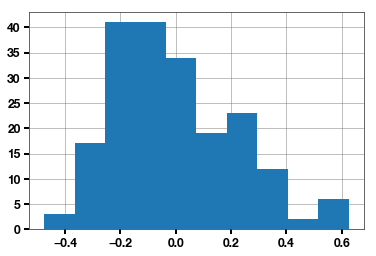

In [142]:
plt.figure()
plt.hist(rats)

print(np.mean(rats), np.median(rats))